In [1]:
import pyPLUTO as pp

In [2]:
import astropy.units as u

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

# Calculating the length and time scales

In [5]:
#Constants
k_b = 1.38*10**-23*(u.joule*u.K**-1) #Boltzman constant
mu = 0.6
mH = 1.67*10**-27*u.kg # mass of hydrogen atom
gamma = 5.0/3.0 #adiabatic index

In [7]:
def CalcL1(Q0, rho, vjet):
    L1 = 2.0*np.sqrt(2.0)*np.sqrt(Q0/(rho*vjet**3)).to(u.parsec)
    return L1

def timeUnit(lengthUnit,velocityUnit):
    tau = (lengthUnit.to(u.m)/velocityUnit.to(u.m/u.second)).to(u.year)
    return tau

def initDensity(n,mu):
    "Calculated initial density of a profile given a number density n, and a mean mass per particle $\mu$"
    rho_0 = (n*mu*mH).to(u.kg/u.m**3)
    return rho_0

In [8]:
#Simulation variables for M = 20 

#Here we define the values that will need to be coded into the init.c file.
Mach = 20.0
cs = 730*(10**3)*(u.m/u.second)
n = (3*10**4)*u.m**-3 #value from HK13, number density of particles per unit volume

print 'cs = ' + str(cs.to(u.km/u.second))
#Define set power
Q_0 = (10**38)*u.Watt
  
#So our variables are
v_jet = Mach*cs
rho_0 = initDensity(n,mu)

tstop = 1 # can equal 1, 2, 3 or 4 depending on which snapshot you want to calculate the age for

print 'rho_0 = ' + str(rho_0)

cs = 730.0 km / s
rho_0 = 3.006e-23 kg / m3


In [9]:
L1 = CalcL1(Q_0,rho_0,v_jet)
print 'L1 = ' + str(L1.to(u.kpc)) #Convert to kpc to get a more appropriate value
tau = timeUnit(L1,cs).to(u.Myr) #Convert to Myr to get a more appropriate value
jetAge = tstop*tau
print 'Jet age = ' + str(jetAge)

L1 = 2.99688912979 kpc
Jet age = 4.01415737031 Myr


In [11]:
#For M = 10 
Mach = 10.0
v_jet = Mach*cs
L1 = CalcL1(Q_0,rho_0,v_jet)
print 'L1 = ' + str(L1.to(u.kpc)) #Convert to kpc to get a more appropriate value
tau = timeUnit(L1,cs).to(u.Myr) #Convert to Myr to get a more appropriate value
jetAge = tstop*tau
print 'Jet age = ' + str(jetAge)

L1 = 8.47648250455 kpc
Jet age = 11.3537515892 Myr


In [12]:
#For M = 5
Mach = 5.0
v_jet = Mach*cs
L1 = CalcL1(Q_0,rho_0,v_jet)
print 'L1 = ' + str(L1.to(u.kpc)) #Convert to kpc to get a more appropriate value
tau = timeUnit(L1,cs).to(u.Myr) #Convert to Myr to get a more appropriate value
jetAge = tstop*tau
print 'Jet age = ' + str(jetAge)

L1 = 23.9751130383 kpc
Jet age = 32.1132589624 Myr


# Calculating Velocity of the Bow Shock

In [24]:
def BowShock(L1,jetAge):
    vb = (L1.to(u.m)/jetAge.to(u.second)).to(u.km/u.second)
    return vb

Dy is the difference in y coordinates, and will be different for high resolution images and low resolution images.
For the JetAge, tstop will always equal to 1, since we are taking the difference from snapshot 1-2, 2-3, and 3-4. I will just calculate the bow shock velocity for the M = 20 jet. 


High Resolution

In [26]:
L1 = 3*u.kpc
jetAge = 40*u.Myr

#from the simulations:
Dy12 = 4.1
Dy23 = 3.7
Dy34 = 3.0
vb12 = Dy12*BowShock(L1,jetAge)
vb23 = Dy23*BowShock(L1,jetAge)
vb34 = Dy34*BowShock(L1,jetAge)
print 'Vbow 1-2 = ' + str(vb12)
print 'Vbow 2-3 = ' + str(vb23)
print 'Vbow 3-4 = ' + str(vb34)

Vbow 1-2 = 300.671108164 km / s
Vbow 2-3 = 271.337341514 km / s
Vbow 3-4 = 220.003249876 km / s


Low Resolution

In [27]:
#from the simulations:
Dy12 = 5.5
Dy23 = 5.0
Dy34 = 4.5
vb12 = Dy12*BowShock(L1,jetAge)
vb23 = Dy23*BowShock(L1,jetAge)
vb34 = Dy34*BowShock(L1,jetAge)
print 'Vbow 1-2 = ' + str(vb12)
print 'Vbow 2-3 = ' + str(vb23)
print 'Vbow 3-4 = ' + str(vb34)

Vbow 1-2 = 403.33929144 km / s
Vbow 2-3 = 366.672083127 km / s
Vbow 3-4 = 330.004874815 km / s


# Imaging the simulations 

Reading Data file : /Users/Katie/Desktop/PLUTO/pluto-4.2.tar/PLUTO/KatieSims/LowRes5/data.0004.dbl


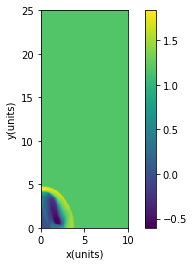

In [5]:
#Low resolution first, with Mach number of 5 and resolution of 100(x) and 250(y)

run_dir = '/Users/Katie/Desktop/PLUTO/pluto-4.2.tar/PLUTO/KatieSims/LowRes5/'
l = 4 #get the file number to plot, l can be 1,2,3 or 4
ns = 'rho' #can change between density, velocities and pressure

curObject = pp.pload(l,w_dir = run_dir) #use pload to get the PLUTO object
globalVar = getattr(curObject,ns).T #as ns = 'rho', get the density grid

x1, x2 = np.meshgrid(curObject.x1, curObject.x2)

plt.pcolormesh(x1,x2, np.log10(globalVar),shading='flat') #add np.log10 to get the log plots
plt.xlabel('x(units)')
plt.ylabel('y(units)')
cb = plt.colorbar()
plt.xlim(0, 10)
plt.ylim(0, 25)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Reading Data file : /Users/Katie/Desktop/PLUTO/pluto-4.2.tar/PLUTO/KatieSims/LowRes10/data.0004.dbl


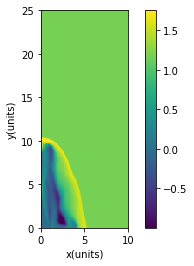

In [6]:
#Low resolution first, with Mach number of 10 and resolution of 100(x) and 250(y)

run_dir = '/Users/Katie/Desktop/PLUTO/pluto-4.2.tar/PLUTO/KatieSims/LowRes10/'
l = 4 #get the file number to plot
ns = 'rho'

curObject = pp.pload(l,w_dir = run_dir) #use pload to get the PLUTO object
globalVar = getattr(curObject,ns).T #as ns = 'rho', get the density grid

x1, x2 = np.meshgrid(curObject.x1, curObject.x2)


plt.pcolormesh(x1,x2, np.log10(globalVar),shading='flat') 
plt.xlabel('x(units)')
plt.ylabel('y(units)')
plt.xlim(0, 10)
plt.ylim(0, 25)
plt.gca().set_aspect('equal', adjustable='box')
cb = plt.colorbar()
plt.show()

Reading Data file : /Users/Katie/Desktop/PLUTO/pluto-4.2.tar/PLUTO/KatieSims/LowRes20/data.0004.dbl


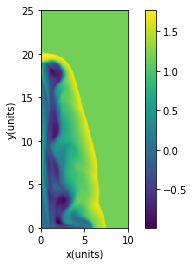

In [18]:
#Low resolution first, with Mach number of 20 and resolution of 100(x) and 250(y)
run_dir = '/Users/Katie/Desktop/PLUTO/pluto-4.2.tar/PLUTO/KatieSims/LowRes20/'
l = 4 #get the file number to plot
ns = 'rho'

curObject = pp.pload(l,w_dir = run_dir) #use pload to get the PLUTO object
globalVar = getattr(curObject,ns).T #as ns = 'rho', get the density grid

x1, x2 = np.meshgrid(curObject.x1, curObject.x2)

plt.pcolormesh(x1,x2, np.log10(globalVar),shading='flat') 
plt.xlabel('x(units)')
plt.ylabel('y(units)')
plt.xlim(0, 10)
plt.ylim(0, 25)
plt.gca().set_aspect('equal', adjustable='box')
cb = plt.colorbar()
plt.show()

Reading Data file : /Users/Katie/Desktop/PLUTO/pluto-4.2.tar/PLUTO/KatieSims/HighRes5/data.0004.dbl


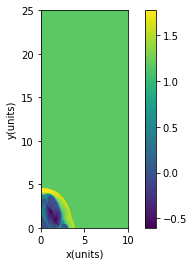

In [16]:
#High resolution, with Mach number of 5 and resolution of 300(x) and 750(y)
run_dir = '/Users/Katie/Desktop/PLUTO/pluto-4.2.tar/PLUTO/KatieSims/HighRes5/'
l = 4 #get the file number to plot
ns = 'rho'

curObject = pp.pload(l,w_dir = run_dir) #use pload to get the PLUTO object
globalVar = getattr(curObject,ns).T #as ns = 'rho', get the density grid

x1, x2 = np.meshgrid(curObject.x1, curObject.x2)


plt.pcolormesh(x1,x2, np.log10(globalVar),shading='flat') 
plt.xlabel('x(units)')
plt.ylabel('y(units)')
plt.xlim(0, 10)
plt.ylim(0, 25)
plt.gca().set_aspect('equal', adjustable='box')
cb = plt.colorbar()
plt.show()

Reading Data file : /Users/Katie/Desktop/PLUTO/pluto-4.2.tar/PLUTO/KatieSims/HighRes10/data.0004.dbl


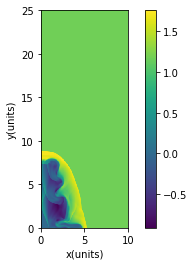

In [19]:
#High resolution, with Mach number of 10 and resolution of 300(x) and 750(y)
run_dir = '/Users/Katie/Desktop/PLUTO/pluto-4.2.tar/PLUTO/KatieSims/HighRes10/'
l = 4 #get the file number to plot
ns = 'rho'

curObject = pp.pload(l,w_dir = run_dir) #use pload to get the PLUTO object
globalVar = getattr(curObject,ns).T #as ns = 'rho', get the density grid

x1, x2 = np.meshgrid(curObject.x1, curObject.x2)


plt.pcolormesh(x1,x2, np.log10(globalVar),shading='flat') 
plt.xlabel('x(units)')
plt.ylabel('y(units)')
plt.xlim(0, 10)
plt.ylim(0, 25)
plt.gca().set_aspect('equal', adjustable='box')
cb = plt.colorbar()
plt.show()

Reading Data file : /Users/Katie/Desktop/PLUTO/pluto-4.2.tar/PLUTO/KatieSims/HighRes20/data.0004.dbl


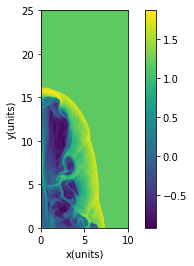

In [10]:
#High resolution, with Mach number of 20 and resolution of 300(x) and 750(y)
run_dir = '/Users/Katie/Desktop/PLUTO/pluto-4.2.tar/PLUTO/KatieSims/HighRes20/'
l = 4 #get the file number to plot
ns = 'rho'

curObject = pp.pload(l,w_dir = run_dir) #use pload to get the PLUTO object
globalVar = getattr(curObject,ns).T #as ns = 'rho', get the density grid

x1, x2 = np.meshgrid(curObject.x1, curObject.x2)

plt.pcolormesh(x1,x2, np.log10(globalVar),shading='flat') 
plt.xlabel('x(units)')
plt.ylabel('y(units)')
cb = plt.colorbar()

plt.xlim(0, 10)
plt.ylim(0, 25)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Reading Data file : /Users/Katie/Desktop/PLUTO/pluto-4.2.tar/PLUTO/KatieSims/HighRes20longer/data.0004.dbl


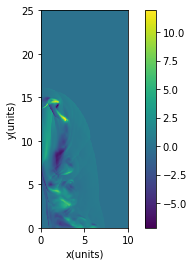

In [20]:
#High resolution, with Mach number of 20 and resolution of 300(x) and 750(y)
run_dir = '/Users/Katie/Desktop/PLUTO/pluto-4.2.tar/PLUTO/KatieSims/HighRes20longer/'
l = 4 #get the file number to plot
ns = 'vx1'

curObject = pp.pload(l,w_dir = run_dir) #use pload to get the PLUTO object
globalVar = getattr(curObject,ns).T #as ns = 'rho', get the density grid

x1, x2 = np.meshgrid(curObject.x1, curObject.x2)

plt.pcolormesh(x1,x2,globalVar,shading='flat') 
plt.xlabel('x(units)')
plt.ylabel('y(units)')
plt.xlim(0, 10)
plt.ylim(0, 25)
plt.gca().set_aspect('equal', adjustable='box')
cb = plt.colorbar()
plt.show()

Reading Data file : /Users/Katie/Desktop/PLUTO/pluto-4.2.tar/PLUTO/KatieSims/HighRes20longer/data.0004.dbl


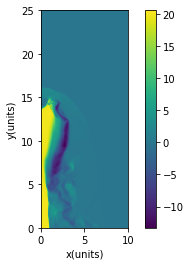

In [21]:
#High resolution, with Mach number of 20 and resolution of 300(x) and 750(y)
run_dir = '/Users/Katie/Desktop/PLUTO/pluto-4.2.tar/PLUTO/KatieSims/HighRes20longer/'
l = 4 #get the file number to plot
ns = 'vx2'

curObject = pp.pload(l,w_dir = run_dir) #use pload to get the PLUTO object
globalVar = getattr(curObject,ns).T #as ns = 'rho', get the density grid

x1, x2 = np.meshgrid(curObject.x1, curObject.x2)

plt.pcolormesh(x1,x2,globalVar,shading='flat') 
plt.xlabel('x(units)')
plt.ylabel('y(units)')
plt.xlim(0, 10)
plt.ylim(0, 25)
plt.gca().set_aspect('equal', adjustable='box')
cb = plt.colorbar()
plt.show()

Reading Data file : /Users/Katie/Desktop/PLUTO/pluto-4.2.tar/PLUTO/KatieSims/HighRes20longer/data.0004.dbl


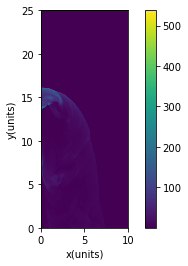

In [22]:
#High resolution, with Mach number of 20 and resolution of 300(x) and 750(y)
run_dir = '/Users/Katie/Desktop/PLUTO/pluto-4.2.tar/PLUTO/KatieSims/HighRes20longer/'
l = 4 #get the file number to plot
ns = 'prs'

curObject = pp.pload(l,w_dir = run_dir) #use pload to get the PLUTO object
globalVar = getattr(curObject,ns).T #as ns = 'rho', get the density grid

x1, x2 = np.meshgrid(curObject.x1, curObject.x2)

plt.pcolormesh(x1,x2,globalVar,shading='flat') 
plt.xlabel('x(units)')
plt.ylabel('y(units)')
plt.xlim(0, 10)
plt.ylim(0, 25)
plt.gca().set_aspect('equal', adjustable='box')
cb = plt.colorbar()
plt.show()